### Embeddings

Embedding is the way for translating into language that computers understands

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
# Simplified 2D example (real embeddings have hundreds of dimensions)
word_embeddings = {
    "cat": [0.8, 0.6],
    "kitten": [0.75, 0.65],
    "dog": [0.7, 0.3],
    "puppy": [0.65, 0.35],
    "car": [-0.5, 0.2],
    "truck": [-0.45, 0.15]
}

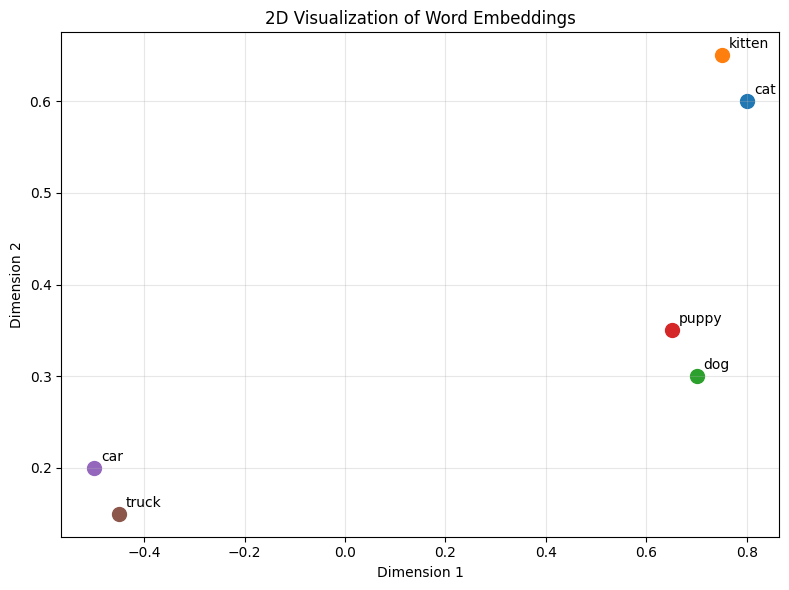

In [13]:
fig,ax = plt.subplots(figsize=(8,6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5,5),textcoords='offset points')

    ax.set_xlabel('Dimension 1')
    ax.set_ylabel('Dimension 2')
    ax.set_title('2D Visualization of Word Embeddings')
    ax.grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()

### Measuring Similarity


In [ ]:
def cosine_similarity(vec1, vec2):
        """
    Cosine similarity measures the angle between two vectors.
    - Result close to 1: Very similar
    - Result close to 0: Not related
    - Result close to -1: Opposite meanings
    """
    dot_product = np.dot(vec1,vec2)
    norm_a = np.linalg.norm(vec1)
    norm_b = np.linalg.norm(vec2)
    return dot_product/(norm_a * norm_b)



In [15]:
cat_vector = [0.8, 0.6, 0.3]
kitten_vector = [0.75, 0.65, 0.35]
car_vector = [-0.5, 0.2, 0.1]

cat_kitten_similarity=cosine_similarity(cat_vector,kitten_vector)
print(cat_kitten_similarity)

0.9966186334192181


In [16]:
cat_car_similarity=cosine_similarity(cat_vector,car_vector)
print(cat_car_similarity)

-0.43718588548916804


In [18]:
###Huggingface and OpenAI Models

from langchain_community.embeddings import HuggingFaceEmbeddings


## Initialize a simple Embedding mode(no API Key needed)
embedding_model = HuggingFaceEmbeddings(
    model_name= "sentence-transformers/all-MiniLM-L6-v2"
)
embedding_model

C:\Users\ameen\AppData\Local\Temp\ipykernel_109744\3018644076.py:7: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the `langchain-huggingface package and should be used instead. To use it run `pip install -U `langchain-huggingface` and import as `from `langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(
c:\Users\ameen\Documents\GenAI\RAG\Python\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\ameen\Documents\GenAI\RAG\Python\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Use

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False, 'architecture': 'BertModel'})
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False, 'include_prompt': True})
  (2): Normalize()
), model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False, show_progress=False)

In [20]:
##create your first embedding
text = "Hello, I am learning about embeddings!"

embedding = embedding_model.embed_query(text)
print(embedding)
print(len(embedding))


[-0.018163273110985756, -0.09955165535211563, 0.013816061429679394, -0.008125964552164078, 0.014152269810438156, 0.0640648901462555, -0.006253400817513466, -0.0030179086606949568, 0.025287244468927383, -0.02019864320755005, 0.024329690262675285, 0.07435064017772675, 0.051177214831113815, 0.022038502618670464, -0.05830622464418411, 0.015268249437212944, 0.023584336042404175, 0.09455393254756927, -0.0650884211063385, 0.01329666469246149, -0.020497549325227737, -0.05690852552652359, 0.03030332736670971, -0.08365613222122192, 0.02659633755683899, -0.01523147989064455, -0.043615397065877914, 0.05398400127887726, 0.0902571752667427, -0.08893882483243942, 0.03964461758732796, -0.008835060521960258, -0.03034372255206108, 0.07425563782453537, -0.05409921333193779, 0.11107999086380005, 0.0368998721241951, -0.008959826081991196, -0.06140242889523506, -0.0031433221884071827, 0.02195817604660988, 0.042208194732666016, -0.028937911614775658, 0.04334278032183647, 0.05449939891695976, -0.0302928723394

In [ ]:
sentences = [
    "The cat sat on the mat",
    "The cat sat on the mat",
    "The dog played in the yard",
    "I love programming in Python",
    "Python is my favorite programming language"
]

embedding_sentence=embedding_model.embed_documents(sentences)

print(embedding_sentence[0])
print(embedding_sentence[1])

[0.1304018348455429, -0.011870108544826508, -0.028117027133703232, 0.05123865604400635, -0.055974431335926056, 0.03019155003130436, 0.030161317437887192, 0.024698367342352867, -0.018370572477579117, 0.05876678600907326, -0.02495315670967102, 0.06015424802899361, 0.039831746369600296, 0.03323054686188698, -0.06131141632795334, -0.049373120069503784, -0.054863519966602325, -0.04007609188556671, 0.05642911046743393, 0.03915659710764885, -0.03473711013793945, -0.013247703202068806, 0.031966228038072586, -0.06349919736385345, -0.06017861142754555, 0.0782344862818718, -0.028303878381848335, -0.04744284227490425, 0.04035927355289459, -0.006630887743085623, -0.0667409673333168, -0.004191380459815264, -0.025311646983027458, 0.053341686725616455, 0.017428111284971237, -0.09792360663414001, 0.006061302963644266, -0.06524164229631424, 0.04557264223694801, 0.023641806095838547, 0.0765848159790039, -0.010264393873512745, -0.004076807294040918, -0.062322795391082764, 0.03370528668165207, 0.0186611227

In [24]:
from langchain_huggingface import HuggingFaceEmbeddings
import time

# Popular models comparison
models = {
    "all-MiniLM-L6-v2": {
        "size": 384,
        "description": "Fast and efficient, good quality",
        "use_case": "General purpose, real-time applications"
    },
    "all-mpnet-base-v2": {
        "size": 768,
        "description": "Best quality, slower than MiniLM",
        "use_case": "When quality matters more than speed"
    },
    "all-MiniLM-L12-v2": {
        "size": 384,
        "description": "Slightly better than L6, bit slower",
        "use_case": "Good balance of speed and quality"
    },
    "multi-qa-MiniLM-L6-cos-v1": {
        "size": 384,
        "description": "Optimized for question-answering",
        "use_case": "Q&A systems, semantic search"
    },
    "paraphrase-multilingual-MiniLM-L12-v2": {
        "size": 384,
        "description": "Supports 50+ languages",
        "use_case": "Multilingual applications"
    }
}

print("📊 Popular Open Source Embedding Models:\n")
for model_name, info in models.items():
    print(f"Model: sentence-transformers/{model_name}")
    print(f"  📏 Embedding size: {info['size']} dimensions")
    print(f"  📝 Description: {info['description']}")
    print(f"  🎯 Use case: {info['use_case']}\n")


📊 Popular Open Source Embedding Models:

Model: sentence-transformers/all-MiniLM-L6-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Fast and efficient, good quality
  🎯 Use case: General purpose, real-time applications

Model: sentence-transformers/all-mpnet-base-v2
  📏 Embedding size: 768 dimensions
  📝 Description: Best quality, slower than MiniLM
  🎯 Use case: When quality matters more than speed

Model: sentence-transformers/all-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Slightly better than L6, bit slower
  🎯 Use case: Good balance of speed and quality

Model: sentence-transformers/multi-qa-MiniLM-L6-cos-v1
  📏 Embedding size: 384 dimensions
  📝 Description: Optimized for question-answering
  🎯 Use case: Q&A systems, semantic search

Model: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
  📏 Embedding size: 384 dimensions
  📝 Description: Supports 50+ languages
  🎯 Use case: Multilingual applications

